In [1]:
## Import Python things!

# NumPy provides tools for doing numerical calculations
import numpy as np

# Matplotlib is for plotting
import matplotlib.pyplot as plt

# VESIcal provides the tools for performing volatile solubility calculations
import VESIcal as v

# Part 1: Calculating how many volatiles dissolve at a given pressure 
- We need to know:
1) Pressure of the magma
2) Temperature of the magma
3) Major element composition of the magma
4) Fluid composition in equilibrium with the magma (e.g., is it just H2O, just CO2, or is the system a mix of H2O and CO2)
- We need to choose what solubility model we want to use!

In [ ]:
# Lets load the major elements for 1 sample - This is a melt inclusion from Kilauea
kilauea = v.Sample({'SiO2':  48.42,
                    'TiO2':   2.45,
                    'Al2O3': 11.90,
                    'Fe2O3':  0.00,
                    'FeO':   11.33,
                    'MgO':   12.51,
                    'CaO':   10.02,
                    'Na2O':   2.10,
                    'K2O':    0.45,
                    'P2O5':   0.30,
                    })
# Pressure in bars, T in celcius, XFluid, 1 is all H2O, 0 is all CO2
calc_Liu = v.calculate_dissolved_volatiles(sample=kilauea, 
                                       pressure=3000, 
                                       temperature=1200, 
                                       X_fluid=0,
                                      model='Liu')
calc_Liu.result

/opt/conda/lib/python3.9/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning:  These calibration limits were selected based on the minimum and maximum values of these oxides (+-5%) in the combined Water and Carbon calibration dataset. As the Liu et al. model incorperates no term for compositional dependence, users must take extreme care when extrapolating this model to compositions which differ significantly from the haplogranites and rhyolites in the calibration dataset. These warnings are simply a guide; we suggest that users carefully compare their major element data to the calibration dataset to check for suitability 
  w.warn(self.calib_check, RuntimeWarning)


{'H2O_liq': 0.0, 'CO2_liq': 0.11542612768557174}

# Oops, clearly that isnt a good choice of model, lets see what options we have. 

In [4]:
## Here is how we get the model names
v.get_model_names()

['ShishkinaIdealMixing',
 'Dixon',
 'IaconoMarziano',
 'Liu',
 'ShishkinaCarbon',
 'ShishkinaWater',
 'DixonCarbon',
 'DixonWater',
 'IaconoMarzianoCarbon',
 'IaconoMarzianoWater',
 'AllisonCarbon',
 'AllisonCarbon_sunset',
 'AllisonCarbon_sfvf',
 'AllisonCarbon_erebus',
 'AllisonCarbon_vesuvius',
 'AllisonCarbon_etna',
 'AllisonCarbon_stromboli',
 'MooreWater',
 'LiuWater',
 'LiuCarbon']

In [5]:
calc_MagmaSat = v.calculate_dissolved_volatiles(sample=kilauea, 
                                       pressure=3000, 
                                       temperature=1200, 
                                       X_fluid=0,
                                  model='MagmaSat')
calc_MagmaSat.result

{'H2O_liq': 0.0, 'CO2_liq': 0.2509157444927196}

## Excersize in Pairs - Lets compare CO2 and H2O solubility as a function of pressure.
- Get into pairs
- Person on the left - How much CO2 dissolves in the Hawaiian magma at 3 kbar pressure? Lets use 4 basaltic models to test (Dixon, IaconoMarziano, ShishkinaIdealMixing, MagmaSat)
- 2nd person, job is to work out how much H2O dissolves at 3 kbar. Compare results. How different are the results as a %? What does this mean about H2O vs. CO2 solubility in terms of how well we know things?
- What do you notice about the speeds of the different models?

## Scroll down for answers - But please try on your own first!!
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

In [9]:
# Use variables to store our choices of calculation parameter.
P = 3000 # bars
T = 1200 # degrees C

# Create a calculation for dissolved volatiles, using the sample we defined
# and the parameters above.
calc_MagmaSat = v.calculate_dissolved_volatiles(sample=kilauea, 
                                       pressure=P, 
                                       temperature=T, 
                                       X_fluid=fluid_composition,
                                      model='MagmaSat')

# Print out the result of the calculation,
print('MagmaSat CO2 wt%')
print(calc_MagmaSat.result['CO2_liq'])

calc_IM = v.calculate_dissolved_volatiles(sample=kilauea, 
                                       pressure=P, 
                                       temperature=T, 
                                       X_fluid=fluid_composition,
                                      model='IaconoMarziano')

# Print out the result of the calculation,
print('IaconoMarziano CO2 wt%')
print(calc_IM.result['CO2_liq'])

calc_Shish = v.calculate_dissolved_volatiles(sample=kilauea, 
                                       pressure=P, 
                                       temperature=T, 
                                       X_fluid=fluid_composition,
                                      model='ShishkinaIdealMixing')

# Print out the result of the calculation,
print('Shishkina CO2 wt%')
print(calc_Shish.result['CO2_liq'])

calc_Dixon = v.calculate_dissolved_volatiles(sample=kilauea, 
                                       pressure=P, 
                                       temperature=T, 
                                       X_fluid=fluid_composition,
                                      model='Dixon')

# Print out the result of the calculation,
print('Dixon CO2 wt%')
print(calc_Dixon.result['CO2_liq'])

MagmaSat CO2 wt%
0.2509157444927196
IaconoMarziano CO2 wt%
0.1876342635470089
Shishkina CO2 wt%
0.2786149256184035
Dixon CO2 wt%
0.1950876480624819


/opt/conda/lib/python3.9/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning: pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, as well as the upper calibration limit of 2000 bar suggested by Lesne et al. (2011), 
  w.warn(self.calib_check, RuntimeWarning)


In [10]:
calc_MagmaSat = v.calculate_dissolved_volatiles(sample=kilauea, 
                                       pressure=P, 
                                       temperature=T, 
                                       X_fluid=1,
                                      model='MagmaSat')

# Print out the result of the calculation 
print('MagmaSat H2O wt%')
print(calc_MagmaSat.result['H2O_liq'])


calc_IM = v.calculate_dissolved_volatiles(sample=kilauea, 
                                       pressure=P, 
                                       temperature=T, 
                                       X_fluid=1,
                                      model='IaconoMarziano')

# Print out the result of the calculation,
print('IaconoMarziano')
print(calc_IM.result['H2O_liq'])


calc_Dixon = v.calculate_dissolved_volatiles(sample=kilauea, 
                                       pressure=P, 
                                       temperature=T, 
                                       X_fluid=1,
                                      model='Dixon')

# Print out the result of the calculation,
print('Dixon H2O wt%')
print(calc_Dixon.result['H2O_liq'])


calc_Shish = v.calculate_dissolved_volatiles(sample=kilauea, 
                                       pressure=P, 
                                       temperature=T, 
                                       X_fluid=1,
                                      model='ShishkinaIdealMixing')

# Print out the result of the calculation,
print('Shishkina H2O wt%')
print(calc_Shish.result['H2O_liq'])

MagmaSat H2O wt%
5.721804718517638
IaconoMarziano
10.71229940498287
Dixon H2O wt%
5.980944061060856
Shishkina H2O wt%
6.286611901206997


/opt/conda/lib/python3.9/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning: pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, as well as the upper calibration limit of 2000 bar suggested by Lesne et al. (2011), 
  w.warn(self.calib_check, RuntimeWarning)


## How would we show this more systematically?

# Part 2 - Calculating saturation pressures

In [12]:
fuego = v.Sample({'SiO2':  49.67,
                  'TiO2':   1.17,
                  'Al2O3': 16.50,
                  'Fe2O3':  1.65,
                  'FeO':    8.43,
                  'MnO':    0.19,
                  'MgO':    4.38,
                  'CaO':    7.90,
                  'Na2O':   3.37,
                  'K2O':    0.79,
                  'P2O5':   0.22,
                  'CO2':    0.0,
                  'H2O':    4.00})

### Exercise 1 - Calculate a H2O (only) saturation pressure
Let's calculate the saturation pressure! This might reflect a circumstance where we have identified the H$_2$O content using plagioclase hygrometry, but we don't have an estimate for the CO$_2$ content:

In [13]:
SatP_noCO2 = v.calculate_saturation_pressure(sample=fuego, temperature=1000)
SatP_noCO2.result

1310

## Now try adding different amounts of CO2! Make a plot of how pressure changes as you do calcs at 0, 1000 ppm, 2000 ppm, 3000 ppm, 4000 ppm

In [14]:
# Can either copy above, or edit the original composition like this
fuego.change_composition({'CO2': 5000/1e4})
# This will allow us to print to check it worked
fuego.get_composition('CO2')

SatP_CO2 = v.calculate_saturation_pressure(sample=fuego, temperature=1000)
SatP_CO2.result


7170

In [16]:
## Why does this matter? 

### Appendix
When I did the calculations to assess this effect for VESIcal Part II, I used the **power of python** to automate the calculations. We didn't have you do this here because it takes some time for the computer to iterate through every calculation (but this is time you can spend doing something else!).

<img src="https://imgs.xkcd.com/comics/compiling.png">

Cartoon from XKCD. Using python means we don't have to compile the code- but sometimes we have to wait for a while to get our results...

To make this work Penny used for loops (which we introduced earlier). All of the calculations required to reproduce the figures in VESIcal II are available on github (https://github.com/PennyWieser/VESIcal_II), but to give you a preview of what this code looks like, here is the calculation for investigating the effect of adding between 0 and 5000 ppmw CO$_2$ to a fixed melt composition (Lowell Moore, Fuego):

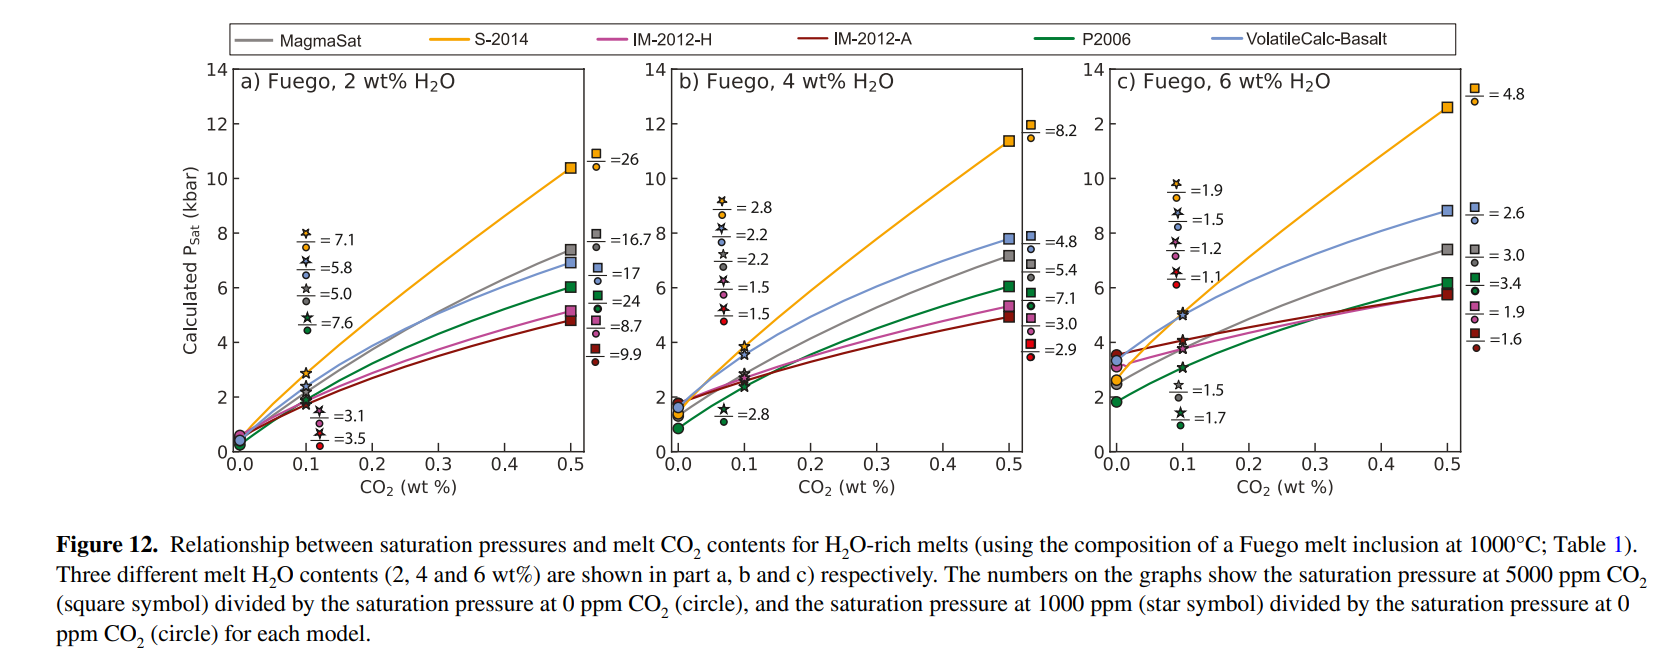

## Lets not do this by hand

In [17]:
# Load in melt inclusion data
myfile= v.BatchFile('Cassidy2015_AndesiteMI_YouTubeDemo.xlsx',
                    sheet_name='Sheet1',  input_type='wtpercent')

In [ ]:
# Allows you to inspect data, and check VESIcal has read column headings correctly (e.g., non zero values for oxides)
myfile.get_data()

In [ ]:
Sat_P_MagmaSat=myfile.calculate_saturation_pressure(temperature="Temp", model='MagmaSat')
Sat_P_MagmaSat

In [ ]:

Sat_P_MagmaSat=myfile.calculate_saturation_pressure(temperature=1050, model='IaconoMarziano')
Sat_P_MagmaSat